In [20]:
# !pip install mlxtend

In [5]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
# loaded and preprocessed the 'Groceries' dataset as a list of transactions
df = pd.read_csv("data/Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [22]:
# Get the count of null values in each column
null_counts = df.isnull().sum()
print(null_counts)

Member_number      0
Date               0
itemDescription    0
dtype: int64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [24]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [59]:
df['itemDescription'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [50]:
# Convert the dataset into a transaction format
# transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).values.tolist()
transactions = [['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
                ['whole milk', 'pastry', 'salty snack'],
                ['canned beer', 'misc. beverages'],
                ['sausage', 'hygiene articles'],
                ['soda', 'pickled vegetables'],
                ['frankfurter', 'curd'],
                ['sausage', 'whole milk', 'rolls/buns'],
                ['whole milk', 'soda'],
                ['beef', 'white bread'],
                ['frankfurter', 'soda', 'whipped/sour cream']]

In [51]:
print(transactions[:10])

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['whole milk', 'pastry', 'salty snack'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles'], ['soda', 'pickled vegetables'], ['frankfurter', 'curd'], ['sausage', 'whole milk', 'rolls/buns'], ['whole milk', 'soda'], ['beef', 'white bread'], ['frankfurter', 'soda', 'whipped/sour cream']]


In [53]:
# Convert the dataset into a transaction format
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [54]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.003, use_colnames=True)

In [55]:
# Generate association rules with the specified confidence level
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


In [56]:
# Store the resulting rule as 'rule2'
rule2 = rules


In [57]:
# Inspect the rule2
print(rule2)


                                   antecedents  \
0                                       (beef)   
1                                (white bread)   
2                                (canned beer)   
3                            (misc. beverages)   
4                                       (curd)   
5                         (whipped/sour cream)   
6                           (hygiene articles)   
7                                (salty snack)   
8                                     (pastry)   
9                                     (pastry)   
10                        (pickled vegetables)   
11                                (rolls/buns)   
12                                (rolls/buns)   
13                               (salty snack)   
14                       (semi-finished bread)   
15                                    (yogurt)   
16                       (semi-finished bread)   
17                       (semi-finished bread)   
18                                    (yogurt)   


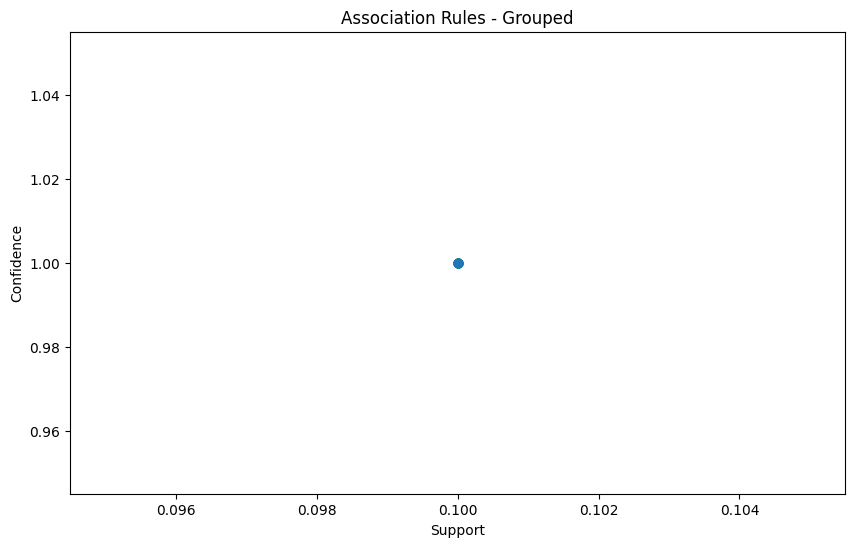

In [58]:
# Plot the rule with the 'grouped' method
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules - Grouped')
plt.show()